In [221]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df = df.drop(columns=["Unnamed: 0"])

In [222]:
df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [223]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [224]:
pd.set_option('display.max_rows', None)
print(df['track_genre'].value_counts())

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000


In [225]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [226]:
#print the row that has missing album name
df[df['album_name'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


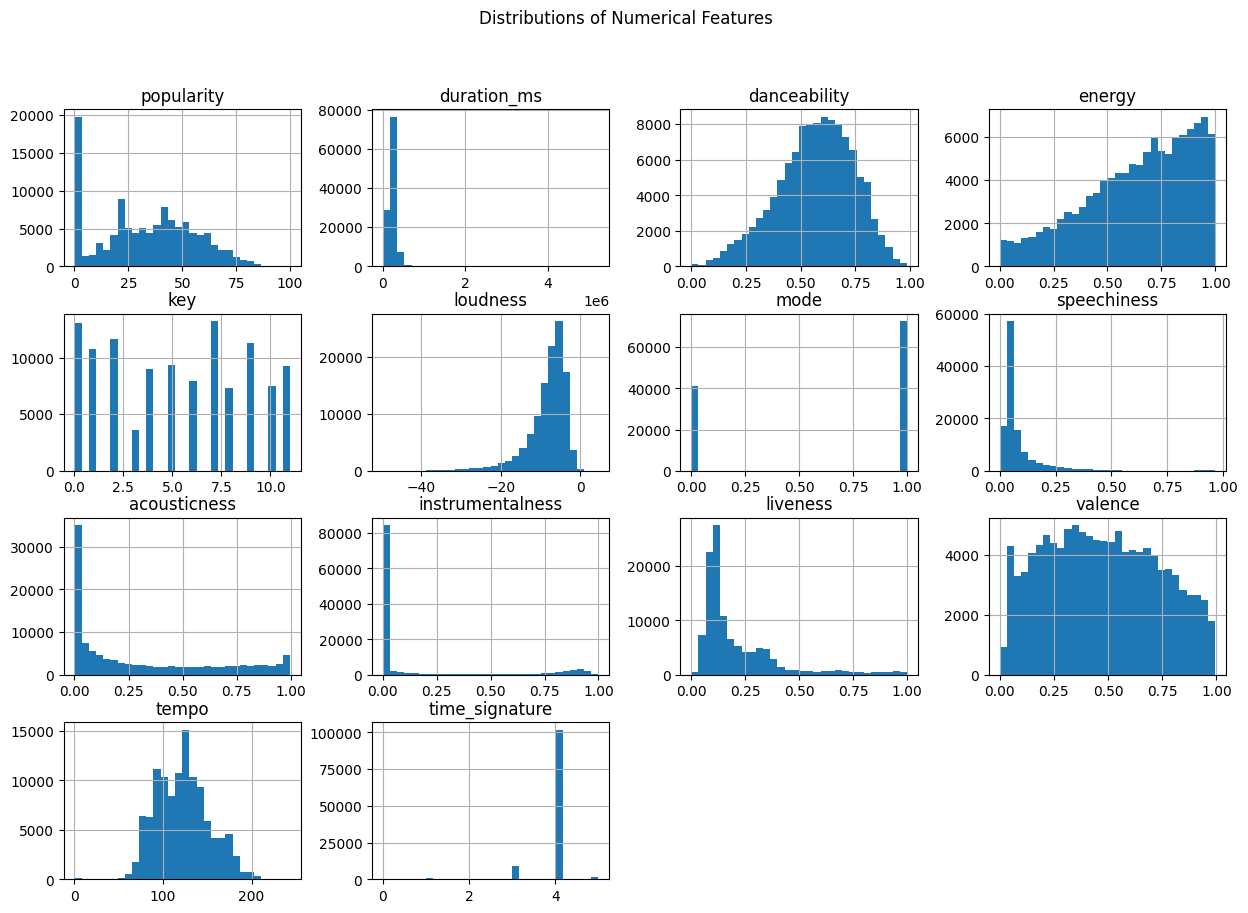

In [227]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distributions of Numerical Features')
plt.show()


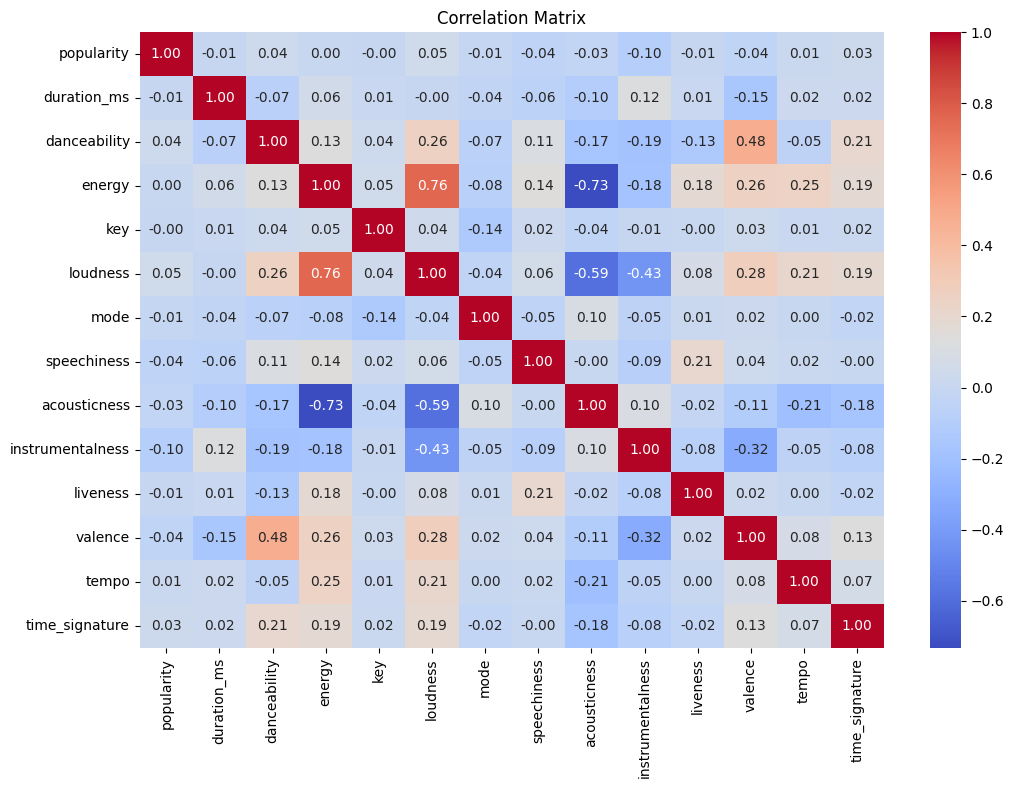

In [228]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Project Check-in 3

In [229]:
lr_all = LogisticRegression(class_weight='balanced', solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features], df['explicit'], test_size=0.2, random_state=12345)
y_test = y_test.to_frame()
lr_all.fit(X=X_train, y=y_train)
lr_all.intercept_, lr_all.coef_

(array([0.11348855]),
 array([[ 6.48777850e-03, -4.52530365e-06,  2.43921902e+00,
          4.36255301e-01, -3.03851273e-03,  5.89381580e-02,
         -1.62905989e-01,  5.13782760e+00, -1.60078659e+00,
         -1.52460802e+00, -6.94706141e-02, -1.79758338e+00,
         -1.37381612e-03,  8.92134214e-02]]))

In [230]:
forty_sample_y = y_test.sample(n=40, random_state=76)
forty_sample_X = X_test.loc[forty_sample_y.index]

In [231]:
print(type(y_test))
pred_val_sample = pd.DataFrame(dict(
    explicit = forty_sample_y['explicit'],
    lr_predict = lr_all.predict_proba(forty_sample_X)[:,1],
    lr_predict_binary = lr_all.predict(forty_sample_X)))
pred_val_sample

<class 'pandas.core.frame.DataFrame'>


,explicit,lr_predict,lr_predict_binary
5538,False,0.531404,True
80675,False,0.380688,False
17523,False,0.402977,False
38083,True,0.446216,False
15220,False,0.359626,False
80884,False,0.239426,False
102016,False,0.213457,False
89461,False,0.513402,True
87924,False,0.513841,True
30829,False,0.760625,True


In [232]:
conf_lr = metrics.confusion_matrix(y_true=pred_val_sample['explicit'],
                                   y_pred=pred_val_sample['lr_predict_binary'])
conf_lr

array([[24, 12],
       [ 1,  3]])

In [233]:
# Logistic regression Accuracy
(conf_lr[0, 0] + conf_lr[1, 1]) / conf_lr.sum()

0.675

In [234]:
# Logistic regression Accuracy alternative
metrics.accuracy_score(y_true=pred_val_sample['explicit'],
                       y_pred=pred_val_sample['lr_predict_binary'])

0.675

In [235]:
# precision
conf_lr[1, 1] / (conf_lr[1, 1] + conf_lr[0, 1])

0.2

In [236]:
# recall score for positive classs
(conf_lr[1, 1]) / conf_lr[1,:].sum()

0.75

In [237]:
# recall score for positive class alternative
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'])

0.75

In [238]:
# recall score for negative class alternative
(conf_lr[0, 0]) / conf_lr[0,:].sum()

0.6666666666666666

In [239]:
# recall score for negative class
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'],
                     pos_label=0)

0.6666666666666666

In [240]:
px.histogram(pred_val_sample, x='lr_predict', color='explicit',
             nbins=20, opacity=0.5,
             barmode='overlay')

Poor results without utilizing feature selection.

In [241]:
scalerfs = StandardScaler()
standardized_datafs = scalerfs.fit_transform(df[numerical_features])

In [242]:
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [243]:
# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.07859134861771035
R^2 Score: 0.011202160197868016


In [220]:
# Print coefficients
print("Lasso Coefficients:", lasso.coef_)

# Identify selected features
selected_features = [feature for feature, coef in zip(numerical_features, lasso.coef_) if coef != 0]
print("Selected Features:", selected_features)


Lasso Coefficients: [ 3.46616808e-04 -1.72060644e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.97352950e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]
Selected Features: ['popularity', 'duration_ms', 'loudness']


# Project Check In 5:
**How are we using PCA in our project?**

We are using PCA for dimensionality reduction to simplify the high-dimensional Spotify dataset. This is done through transforming correlated numerical features into a smaller set of uncorrelated features to model on. This allows us to retain the majority of the data's variance at the same time as improve the model's efficiency. PCA helps us learn structure in the data by identifying clusters of genres in the principal component space which shows us the relationships between audio features and the genre of the song.

In [244]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# scale our numerical features so mean is 0 and variance is 1:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_features])

# compute first pca model on our standardized data to figure out how many components to use
first_pca = PCA()
first_pca.fit(standardized_data)

# compute the cumulative explained variance for each principal component:
explained_variance_ratio = first_pca.explained_variance_ratio_  # get the proportion of total variance explained by each principal
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # calculate the cumulative sum of an array


The first 10 compenents explain about 88% of the variance and the first 11 components explain 93%. A good threshold is about 90% so we'll use 11 components.

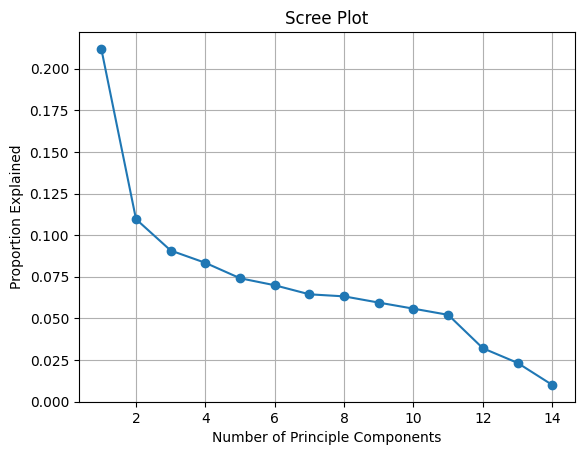

In [245]:
proportion_explained = explained_variance_ratio / sum(explained_variance_ratio)

plt.plot(range(1, len(proportion_explained) + 1), proportion_explained, marker = 'o', linestyle = '-')
plt.title('Scree Plot')
plt.xlabel('Number of Principle Components')
plt.ylabel('Proportion Explained')
plt.grid(True)
plt.show()

In [246]:
pca = PCA(n_components=11)
pca_result = pca.fit_transform(standardized_data)

eigenvalues = pca.explained_variance_ # variance explained per component

eigen_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
})
print(eigen_df.head(11))

    Eigenvalue  Explained Variance Ratio  Cumulative Explained Variance
0     2.967197                  0.211941                       0.211941
1     1.534671                  0.109618                       0.321559
2     1.270808                  0.090771                       0.412330
3     1.167148                  0.083367                       0.495697
4     1.037470                  0.074104                       0.569802
5     0.978550                  0.069896                       0.639698
6     0.902253                  0.064446                       0.704144
7     0.885015                  0.063215                       0.767358
8     0.832489                  0.059463                       0.826821
9     0.781411                  0.055815                       0.882636
10    0.729568                  0.052112                       0.934747


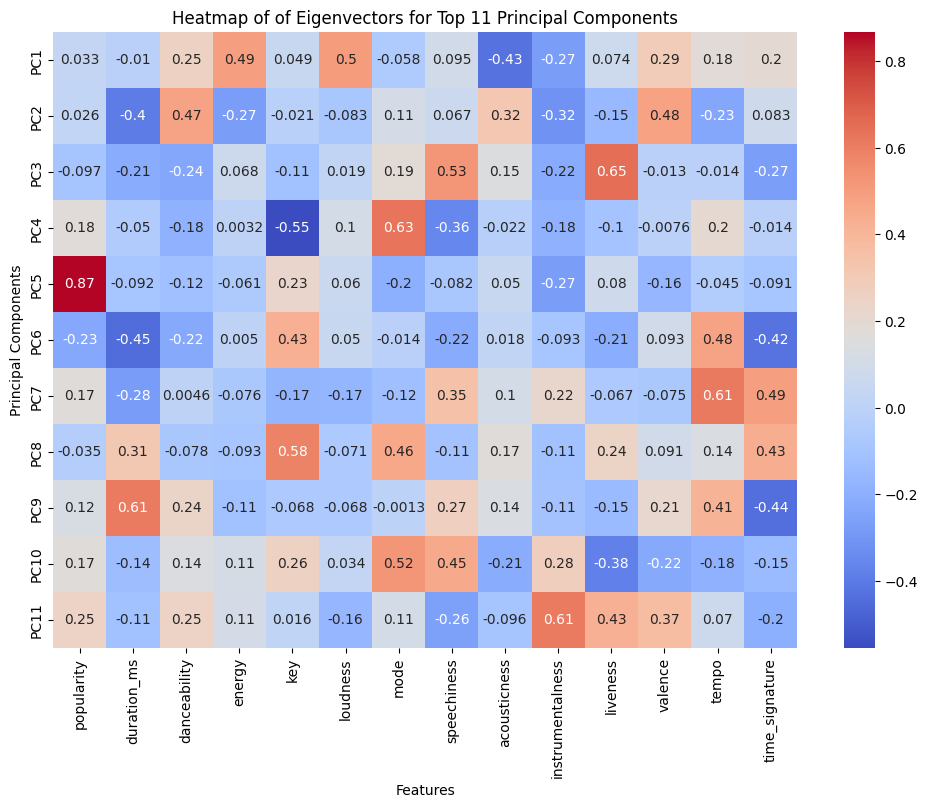

In [247]:
eigenvectors = pca.components_  # Shape: (11 components, n_features)

plt.figure(figsize=(12, 8))
sns.heatmap(eigenvectors, annot=True, cmap='coolwarm', xticklabels=numerical_features, yticklabels=[f'PC{i+1}' for i in range(11)])
plt.title('Heatmap of of Eigenvectors for Top 11 Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

Example analysis:
- Energy (0.49) and loudness (0.5) are the most influential features defining PC1. PC1 accounts for about 21% of the total variance, so that means 21% of the data's variability can attributed to variations of energy and loudness.

# Project Check-in 6
Application of a neural network- Classification of track genre utilizing all numerical features.



In [248]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [249]:
X_tensor = torch.from_numpy(standardized_data).to(torch.float32)
y_tensor = torch.from_numpy(df['track_genre'].astype('category').cat.codes.values.copy())
y_tensor = y_tensor.to(torch.int64)
print("X_tensor:", X_tensor.shape, X_tensor.dtype)
print("y_tensor:", y_tensor.shape, y_tensor.dtype)

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
joint_dataset = JointDataset(X_tensor, y_tensor)
train_loader = DataLoader(joint_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(joint_dataset, batch_size=64, shuffle=True)
# Define a neural network for Spotify
class Spotify(nn.Module):
    def __init__(self):
        super(Spotify, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(14, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 114)
        )

    def forward(self, x):
        return self.model(x)

X_tensor: torch.Size([114000, 14]) torch.float32
y_tensor: torch.Size([114000]) torch.int64


In [250]:
# Initialize model, loss, and optimizer
### To-do ###
spotify_model = Spotify()
spotify_loss_fn = nn.CrossEntropyLoss()
spotify_optimizer = optim.Adam(spotify_model.parameters(), lr=0.001)

In [218]:
# Training the Spotify model
### Training takes a while ###
epochs = 20
for epoch in range(epochs):
    total_loss = 0
    for features, labels in train_loader:
        # Forward pass
        predictions = spotify_model(features)
        loss = spotify_loss_fn(predictions, labels)
        pass

        # Backward pass
        spotify_optimizer.zero_grad()
        loss.backward()
        spotify_optimizer.step()

        total_loss += loss.item()
        pass

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

Epoch [1/20], Loss: 3.3064
Epoch [2/20], Loss: 2.9139
Epoch [3/20], Loss: 2.7818
Epoch [4/20], Loss: 2.7050
Epoch [5/20], Loss: 2.6546
Epoch [6/20], Loss: 2.6168
Epoch [7/20], Loss: 2.5853
Epoch [8/20], Loss: 2.5594
Epoch [9/20], Loss: 2.5370
Epoch [10/20], Loss: 2.5160
Epoch [11/20], Loss: 2.4982
Epoch [12/20], Loss: 2.4827
Epoch [13/20], Loss: 2.4671
Epoch [14/20], Loss: 2.4525
Epoch [15/20], Loss: 2.4416
Epoch [16/20], Loss: 2.4290
Epoch [17/20], Loss: 2.4178
Epoch [18/20], Loss: 2.4070
Epoch [19/20], Loss: 2.3961
Epoch [20/20], Loss: 2.3855


In [219]:
# Evaluating on test data
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        ### To-do ###
        predictions = spotify_model(features)
        _, predicted = torch.max(predictions.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pass

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 35.80%


2. Our metrics for evaluation are loss and accuracy. Loss refers to how well our model is fitting to the training data, whereas accuracy evaluates how well our model is actually performing on real data.

3. Training was attempted with batch sizes of 64, hidden layer sizes of 14-128-64-114, and a learning rate of 0.001. Achieved relatively high loss rates of 2.4 after 20 epochs. Adjusting learning rate to 0.005 gave us even worse results. Returned learning rate back to 0.001 and modified the hidden layers to be more complex to 14-256-128-114, which very slightly improved our loss to 2.38. This gave us an unacceptable accuracy rate of 35.69%.